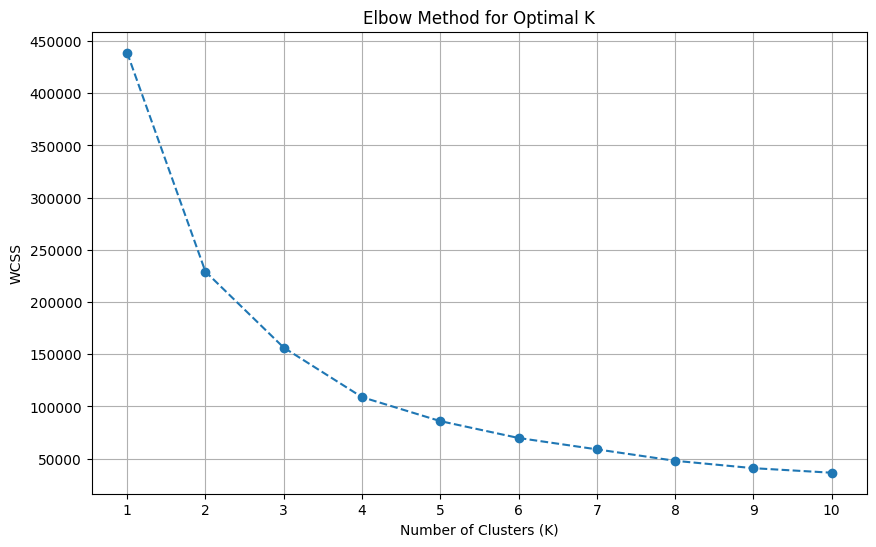

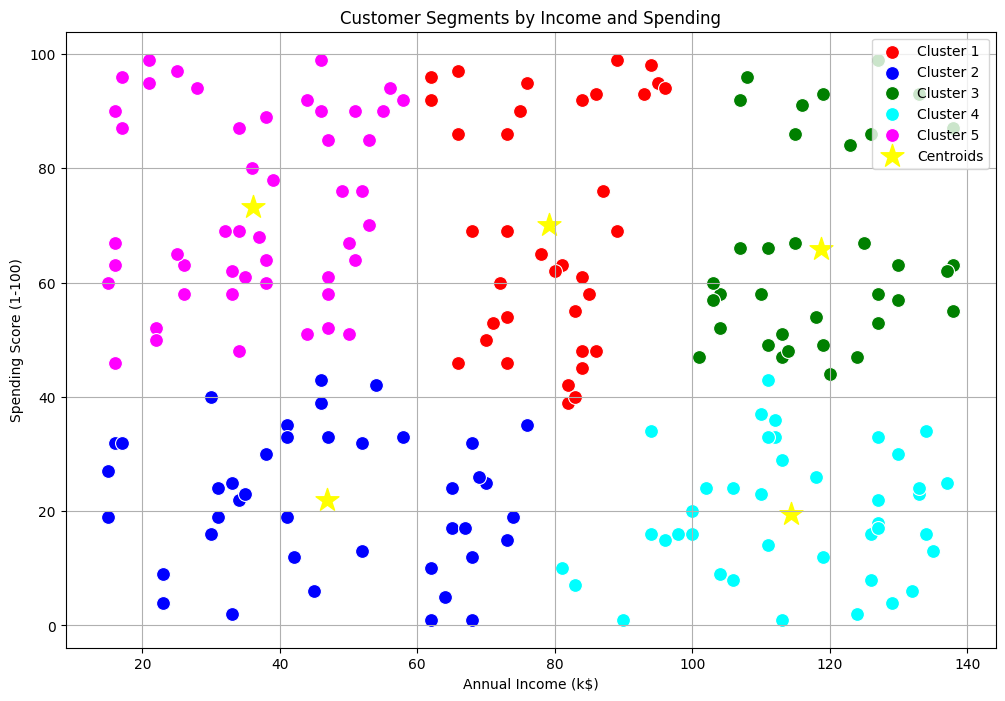


Data with Cluster Assignments:
   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   56                  84                      61        0
1   69                  86                      48        0
2   46                  41                      19        1
3   32                  23                       4        1
4   60                  76                      35        1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# --- 1. Create a Sample Dataset ---
# In a real-world scenario, you would load your data here, e.g., df = pd.read_csv('your_data.csv')
# For this example, we'll generate synthetic data.
np.random.seed(42)
data = {
    'Age': np.random.randint(18, 70, size=200),
    'Annual Income (k$)': np.random.randint(15, 140, size=200),
    'Spending Score (1-100)': np.random.randint(1, 100, size=200)
}
df = pd.DataFrame(data)

# We are interested in clustering based on income and spending patterns.
# So, we'll select those two columns for our model.
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# --- 2. Find the Optimal Number of Clusters (K) using the Elbow Method ---
# We calculate the Within-Cluster Sum of Squares (WCSS) for a range of K values.
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ gives the WCSS value

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# From the graph, the "elbow" is at K=5. This is our optimal number of clusters.

# --- 3. Apply K-Means with the Optimal K ---
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

# Fit the model and predict the cluster for each data point
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to our original dataframe
df['Cluster'] = y_kmeans

# --- 4. Visualize the Clusters ---
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color='red', label='Cluster 1', s=100)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color='blue', label='Cluster 2', s=100)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color='green', label='Cluster 3', s=100)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color='cyan', label='Cluster 4', s=100)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color='magenta', label='Cluster 5', s=100)

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='*')

plt.title('Customer Segments by Income and Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# Display the first few rows with cluster assignments
print("\nData with Cluster Assignments:")
print(df.head())

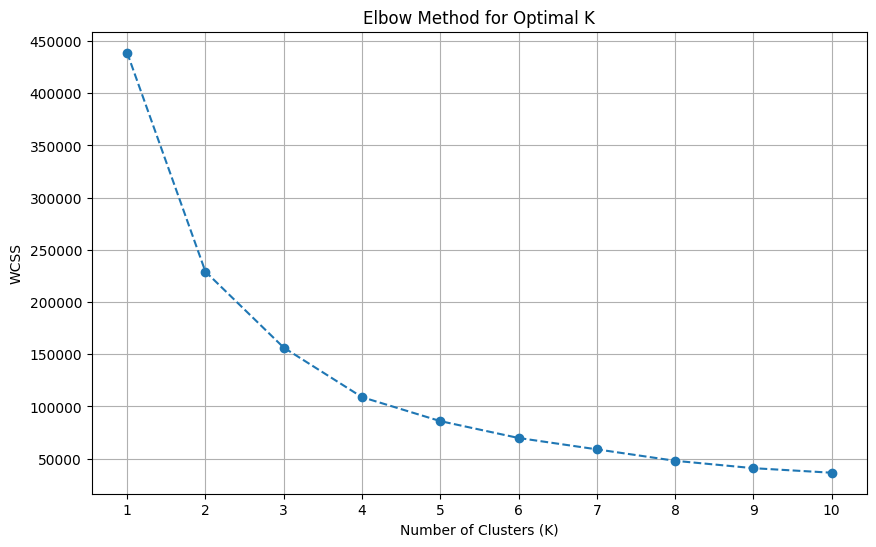


--- Visualizing Clusters ---


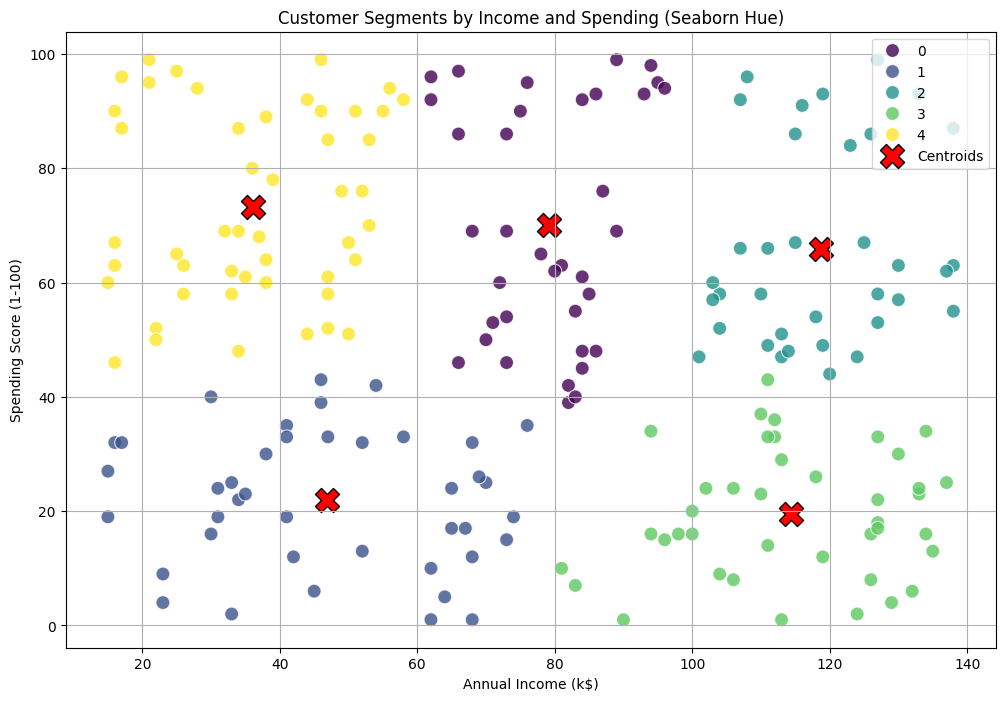

http://googleusercontent.com/image_generation_content/0


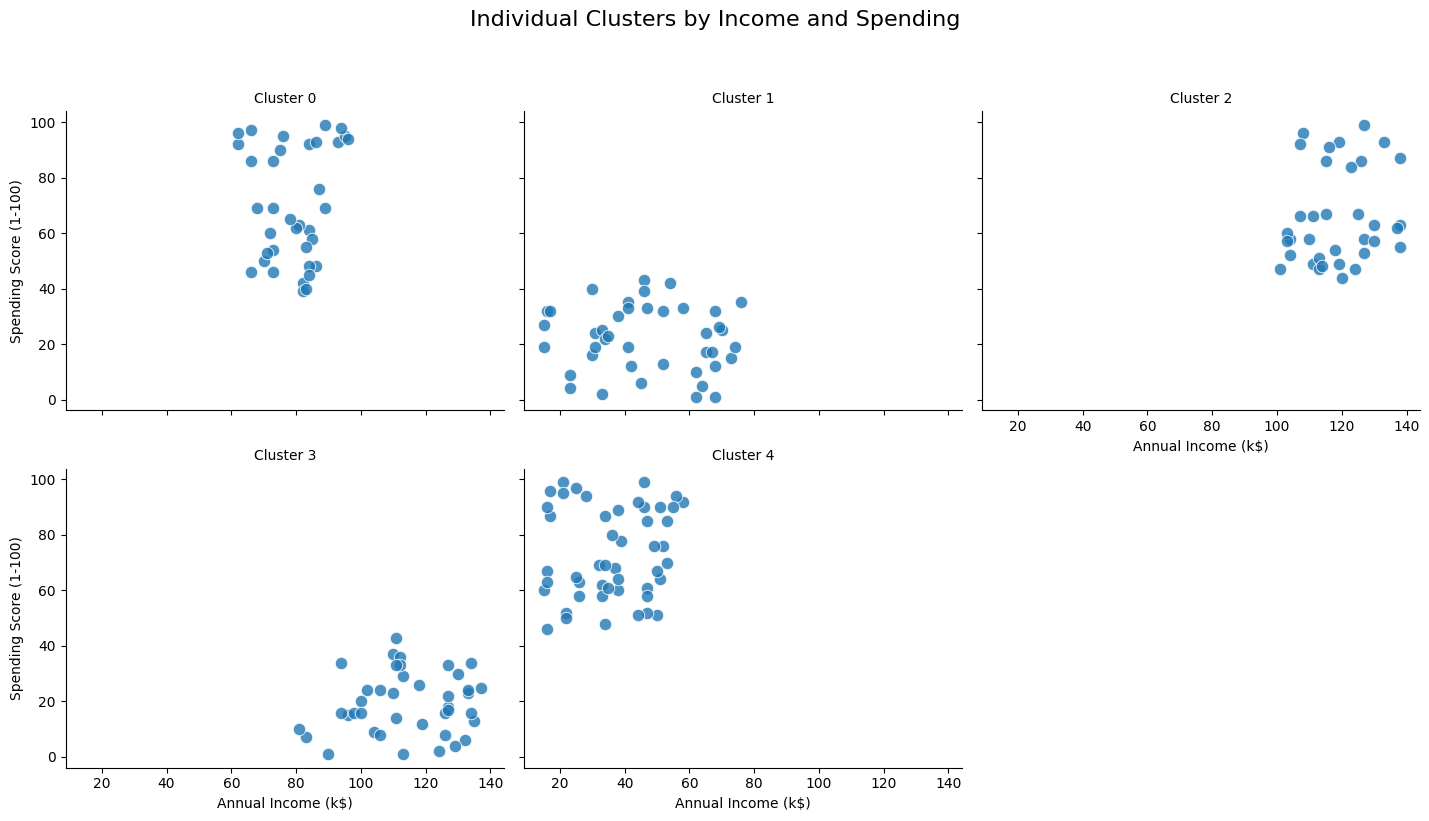

http://googleusercontent.com/image_generation_content/1


/var/folders/pd/cnvb6d5s3qz2yt0_lq2vt5180000gn/T/ipykernel_42131/2792296407.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)', palette='viridis')


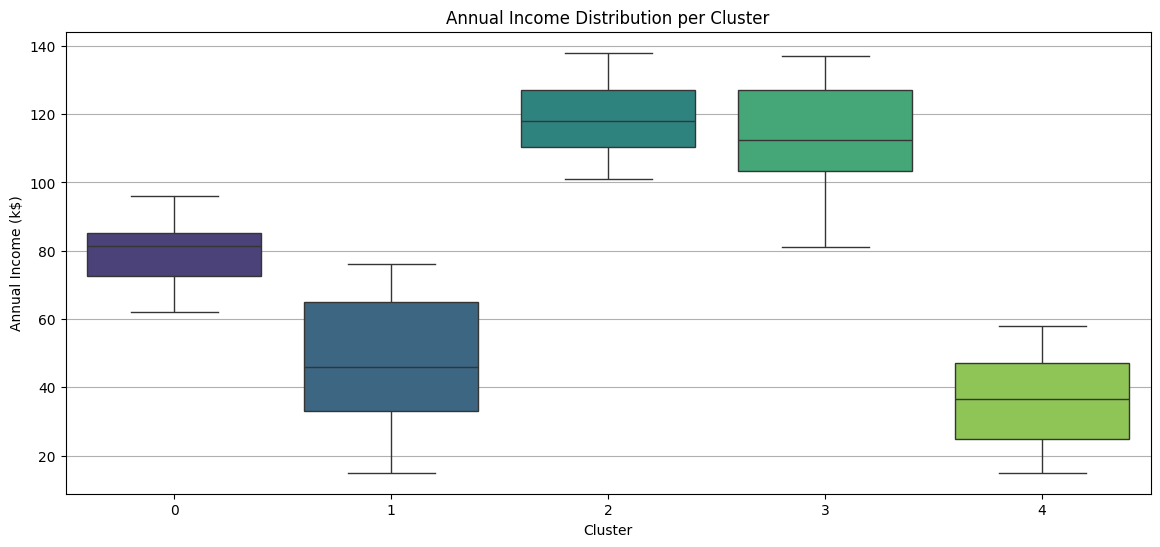

http://googleusercontent.com/image_generation_content/2


/var/folders/pd/cnvb6d5s3qz2yt0_lq2vt5180000gn/T/ipykernel_42131/2792296407.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', palette='viridis')


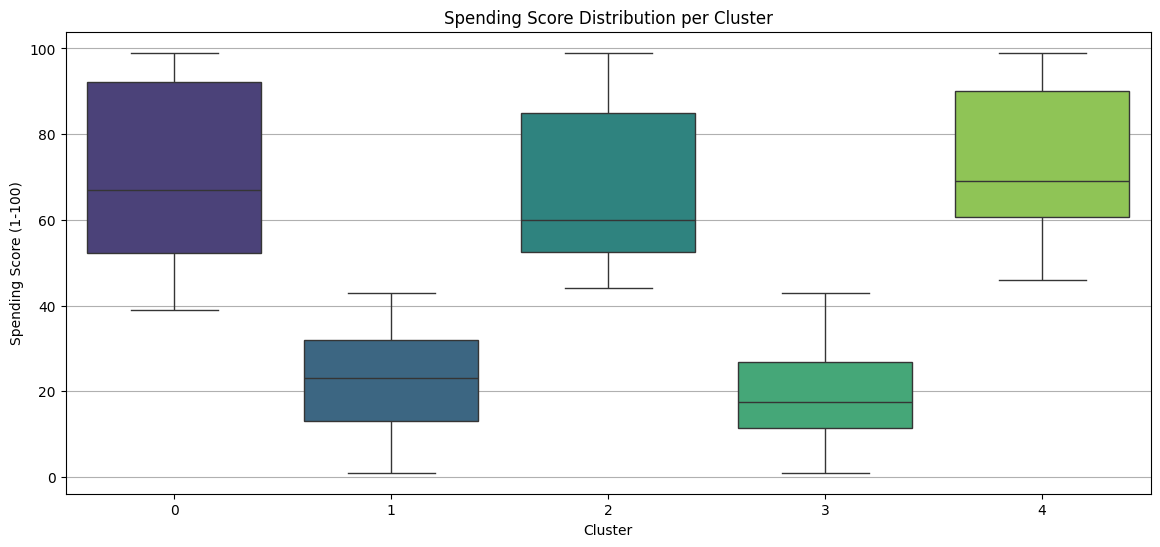

http://googleusercontent.com/image_generation_content/3

--- Cluster Statistics ---
         Annual Income (k$)  Spending Score (1-100)        Age
Cluster                                                       
0                 79.194444               70.111111  41.888889
1                 46.829268               22.024390  42.731707
2                118.685714               65.857143  42.028571
3                114.375000               19.450000  44.250000
4                 36.166667               73.291667  45.500000


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# --- 1. Create a Sample Dataset ---
np.random.seed(42)
data = {
    'Age': np.random.randint(18, 70, size=200),
    'Annual Income (k$)': np.random.randint(15, 140, size=200),
    'Spending Score (1-100)': np.random.randint(1, 100, size=200)
}
df = pd.DataFrame(data)

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# --- 2. Find the Optimal Number of Clusters (K) using the Elbow Method ---
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# From the graph, let's assume optimal_k = 5.
optimal_k = 5

# --- 3. Apply K-Means with the Optimal K ---
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans # Add cluster labels to the DataFrame

# --- 4. Enhanced Visualizations of the Clusters ---

print("\n--- Visualizing Clusters ---")

# Visualization 1: Scatter plot with Seaborn 'hue'
# This is generally the most straightforward way to visualize clusters.
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',        # Color points by cluster
    palette='viridis',    # Choose a color palette
    s=100,                # Size of points
    alpha=0.8,            # Transparency
    legend='full'
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c='red',
    label='Centroids',
    marker='X', # Changed centroid marker for better visibility
    edgecolor='black'
)
plt.title('Customer Segments by Income and Spending (Seaborn Hue)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()
print("http://googleusercontent.com/image_generation_content/0")

# Visualization 2: Separate plots for each cluster using FacetGrid
# This helps in focusing on the characteristics of each individual cluster.
g = sns.FacetGrid(df, col="Cluster", col_wrap=3, height=4, aspect=1.2, palette='viridis')
g.map(sns.scatterplot, 'Annual Income (k$)', 'Spending Score (1-100)', s=80, alpha=0.8)
g.set_axis_labels('Annual Income (k$)', 'Spending Score (1-100)')
g.set_titles("Cluster {col_name}")
plt.suptitle('Individual Clusters by Income and Spending', y=1.02, fontsize=16) # Adjust suptitle position
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()
print("http://googleusercontent.com/image_generation_content/1")


# Visualization 3: Box plots to analyze cluster characteristics (e.g., income distribution per cluster)
# This helps to understand the statistical properties of each cluster for the chosen features.
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)', palette='viridis')
plt.title('Annual Income Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')
plt.grid(axis='y')
plt.show()
print("http://googleusercontent.com/image_generation_content/2")


plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', palette='viridis')
plt.title('Spending Score Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.grid(axis='y')
plt.show()
print("http://googleusercontent.com/image_generation_content/3")


# --- 5. Display Cluster Statistics ---
print("\n--- Cluster Statistics ---")
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()
print(cluster_summary)